In [1]:
import numpy as np
import keras
import math
from sklearn import datasets
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt

[[-0.33145906 -0.30914854]
 [ 0.04722455  0.03945993]
 [ 0.8482271  -0.0129878 ]
 ...
 [ 0.52145307 -0.95245365]
 [ 1.35472146 -0.71949786]
 [-0.0954327   0.92006456]]
[4 4 4 ... 2 2 3]


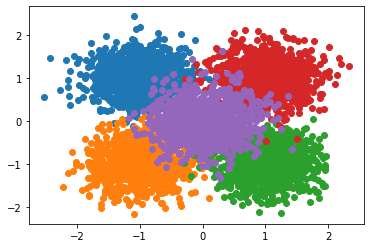

In [2]:
n_pts=5000
centers=[[-1,1],[-1,-1],[1,-1],[1,1],[0,0]]
X,y=datasets.make_blobs(n_samples=n_pts,random_state=123,centers=centers,cluster_std=0.4)
print(X)
print(y)
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])
plt.scatter(X[y==3,0],X[y==3,1])
plt.scatter(X[y==4,0],X[y==4,1])

In [3]:
y_cat=to_categorical(y,5)
print(y_cat)

[[0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 ...
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]]


In [4]:
model=Sequential()
model.add(Dense(5, input_shape=(2,),activation='softmax'))
model.compile(Adam(learning_rate=0.001),'categorical_crossentropy',metrics=['accuracy'])

In [5]:
history=model.fit(X,y_cat,verbose=1,batch_size=40,epochs=900)

Epoch 1/900
125/125 [==============================] - 13s 2ms/step - loss: 1.8412 - accuracy: 0.2074
Epoch 2/900
125/125 [==============================] - 0s 2ms/step - loss: 1.6602 - accuracy: 0.2005
Epoch 3/900
125/125 [==============================] - 0s 2ms/step - loss: 1.4711 - accuracy: 0.2584
Epoch 4/900
125/125 [==============================] - 0s 2ms/step - loss: 1.3475 - accuracy: 0.5938
Epoch 5/900
125/125 [==============================] - 0s 2ms/step - loss: 1.2175 - accuracy: 0.6311
Epoch 6/900
125/125 [==============================] - 0s 2ms/step - loss: 1.1131 - accuracy: 0.7128
Epoch 7/900
125/125 [==============================] - 0s 2ms/step - loss: 1.0358 - accuracy: 0.7581
Epoch 8/900
125/125 [==============================] - 0s 2ms/step - loss: 0.9523 - accuracy: 0.7892
Epoch 9/900
125/125 [==============================] - 0s 2ms/step - loss: 0.8835 - accuracy: 0.8164
Epoch 10/900
125/125 [==============================] - 0s 2ms/step - loss: 0.8232 - accur

In [6]:
def plot_multiclass_decision_boundary(X,y,model):
  x_span=np.linspace(min(X[:,0])-1,max(X[:,0])+1)
  y_span=np.linspace(min(X[:,1])-1,max(X[:,1])+1)
  xx,yy=np.meshgrid(x_span,y_span)
  grid=np.c_[xx.ravel(),yy.ravel()]
  pred_func=model.predict_classes(grid)
  z=pred_func.reshape(xx.shape)
  plt.contourf(xx,yy,z)


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


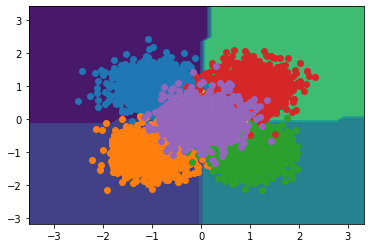

In [7]:
plot_multiclass_decision_boundary(X,y_cat,model)
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==2,1])
plt.scatter(X[y==2,0],X[y==2,1])
plt.scatter(X[y==3,0],X[y==3,1])
plt.scatter(X[y==4,0],X[y==4,1])

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


prediction is: [4]


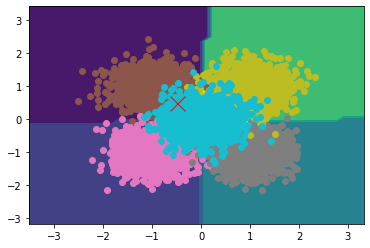

In [8]:
plot_multiclass_decision_boundary(X,y_cat,model)
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==2,1])
plt.scatter(X[y==2,0],X[y==2,1])
plt.scatter(X[y==3,0],X[y==3,1])
plt.scatter(X[y==4,0],X[y==4,1])
plot_multiclass_decision_boundary(X,y_cat,model)
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==2,1])
plt.scatter(X[y==2,0],X[y==2,1])
plt.scatter(X[y==3,0],X[y==3,1])
plt.scatter(X[y==4,0],X[y==4,1])
x=-0.5
y=0.5

point=np.array([[x,y]])
prediction=model.predict_classes(point)
plt.plot([x],[y],marker='x',markersize=15,color='red')
print("prediction is:", prediction)
